# NLP based on External Data

https://www.kaggle.com/datasets/datasnaek/mbti-type

# Task 1 Data requirement for ML Task

In [37]:
import numpy as np 
import pandas as pd 

In [38]:
df_post = pd.read_csv('/Users/jenniferzhang/fall-2023-reddit-project-team-10/data/csv/clean_post.csv')

In [40]:
# type convert
df_post['post'] = df_post['post'].astype(str)


# List of MBTI types to search for
mbti_types = [
    "INFJ", "ENFP", "INTJ", "ENFJ", "INFP", "ENTP", "INTP", "ESFJ", "ISFJ", "ENTJ",
    "ISTJ", "ESFP", "ISFP", "ESTJ", "ISTP", "ESTP"
]

# Function to find MBTI types in a post
def find_mbti(post):
    post_lower = post.lower()
    found_types = [mbti_type for mbti_type in mbti_types if mbti_type.lower() in post_lower]
    return ", ".join(found_types)

# Apply the function to the 'post' column
df_post['mbti_in_post'] = df_post['post'].apply(find_mbti)

In [41]:
# filter for the empty rows
mbti_in_post = df_post

mbti_in_post = mbti_in_post.dropna(subset=['mbti_in_post'])
mbti_in_post = mbti_in_post[mbti_in_post['mbti_in_post'] != ""]

In [42]:
# length check
len(mbti_in_post)

80388

In [43]:
mbti_in_post.head()

type                                               post mbti_in_post
0   INFJ  enfp and intj moments    sportscenter not top ...   ENFP, INTJ
4   INFJ  The last thing my INFJ friend posted on his fa...         INFJ
5   INFJ  Hello ENFJ7. Sorry to hear of your distress. I...         ENFJ
12  INFJ  Dear ENFP:  What were your favorite video game...         ENFP
17  INFJ  Yo entp ladies... if you're into a complimenta...         ENTP

In [44]:
# Save to data 
mbti_in_post.to_csv("/Users/jenniferzhang/fall-2023-reddit-project-team-10/data/csv/mbti_in_post.csv",index=False)

# Task 2. MBTI Topic Preferences

In [46]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
from os import path
from PIL import Image
from collections import Counter 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


## 1.1 Data Processing

In [69]:
# Load the data 
df_post = pd.read_csv('/Users/jenniferzhang/fall-2023-reddit-project-team-10/data/csv/clean_post.csv')

In [70]:
df_post.head()

type                                               post
0  INFJ  enfp and intj moments    sportscenter not top ...
1  INFJ  What has been the most life-changing experienc...
2  INFJ                       On repeat for most of today.
3  INFJ               May the PerC Experience immerse you.
4  INFJ  The last thing my INFJ friend posted on his fa...

In [71]:
# split for different dichotomous axes
df_post['I_E'] = df_post['type'].str[0]
df_post['N_S'] = df_post['type'].str[1]
df_post['T_F'] = df_post['type'].str[2]
df_post['J_P'] = df_post['type'].str[3]

df_post['post'] = df_post['post'].astype(str)
df_post.head()

type                                               post I_E N_S T_F J_P
0  INFJ  enfp and intj moments    sportscenter not top ...   I   N   F   J
1  INFJ  What has been the most life-changing experienc...   I   N   F   J
2  INFJ                       On repeat for most of today.   I   N   F   J
3  INFJ               May the PerC Experience immerse you.   I   N   F   J
4  INFJ  The last thing my INFJ friend posted on his fa...   I   N   F   J

## 1.2  Vocabulary Richness and Complexity Analysis

In [73]:
import textstat
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Ensure you have the necessary NLTK data
nltk.download('punkt')

def analyze_post(post):
    # Tokenize the post and calculate lexical diversity and word length
    tokens = word_tokenize(post)
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    avg_word_length = sum(len(word) for word in tokens) / num_tokens if num_tokens > 0 else 0
    
    # Lexical diversity is the ratio of unique tokens to total tokens
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    
    # Readability scores
    flesch_reading_ease = textstat.flesch_reading_ease(post)
    gunning_fog = textstat.gunning_fog(post)

    return {
        "lexical_diversity": lexical_diversity,
        "avg_word_length": avg_word_length,
        "flesch_reading_ease": flesch_reading_ease,
        "gunning_fog": gunning_fog
    }

# Apply the analysis to each post
df_post['analysis'] = df_post['post'].apply(analyze_post)

df_post.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jenniferzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


type                                               post I_E N_S T_F J_P  \
0  INFJ  enfp and intj moments    sportscenter not top ...   I   N   F   J   
1  INFJ  What has been the most life-changing experienc...   I   N   F   J   
2  INFJ                       On repeat for most of today.   I   N   F   J   
3  INFJ               May the PerC Experience immerse you.   I   N   F   J   
4  INFJ  The last thing my INFJ friend posted on his fa...   I   N   F   J   

                                            analysis  
0  {'lexical_diversity': 1.0, 'avg_word_length': ...  
1  {'lexical_diversity': 1.0, 'avg_word_length': ...  
2  {'lexical_diversity': 1.0, 'avg_word_length': ...  
3  {'lexical_diversity': 1.0, 'avg_word_length': ...  
4  {'lexical_diversity': 1.0, 'avg_word_length': ...

In [74]:
# Extracting each item in the 'analysis' into separate columns
df_features = pd.json_normalize(df_post['analysis'])
df_extended = pd.concat([df_post.drop('analysis', axis=1), df_features], axis=1)

df_extended.head()  

type                                               post I_E N_S T_F J_P  \
0  INFJ  enfp and intj moments    sportscenter not top ...   I   N   F   J   
1  INFJ  What has been the most life-changing experienc...   I   N   F   J   
2  INFJ                       On repeat for most of today.   I   N   F   J   
3  INFJ               May the PerC Experience immerse you.   I   N   F   J   
4  INFJ  The last thing my INFJ friend posted on his fa...   I   N   F   J   

   lexical_diversity  avg_word_length  flesch_reading_ease  gunning_fog  
0                1.0         5.000000                78.25         8.00  
1                1.0         4.727273                78.25         8.00  
2                1.0         3.285714                90.77         2.40  
3                1.0         4.428571                56.93         9.07  
4                1.0         4.450000                78.75         5.91

In [75]:
# Save to data 
df_extended.to_csv("/Users/jenniferzhang/fall-2023-reddit-project-team-10/data/csv/post_diversity_analysis.csv",index=False)

### 1.2.1 16 MBTI

In [76]:
# Load the data 
df_extended = pd.read_csv('/Users/jenniferzhang/fall-2023-reddit-project-team-10/data/csv/post_diversity_analysis.csv')

In [77]:
# Group by MBTI type and compute the average of each feature
grouped_analysis = df_extended.groupby('type').mean().reset_index()
grouped_analysis

type  lexical_diversity  avg_word_length  flesch_reading_ease  gunning_fog
0   ENFJ           0.855082         3.715352            77.803870     7.655780
1   ENFP           0.856190         3.694274            79.522370     7.552258
2   ENTJ           0.863587         3.804960            76.428244     7.895928
3   ENTP           0.868430         3.779508            77.389784     7.824322
4   ESFJ           0.862479         3.732702            76.502893     7.570841
5   ESFP           0.868052         3.687037            80.307185     7.072569
6   ESTJ           0.859866         3.734023            79.480424     7.664124
7   ESTP           0.867671         3.719831            80.806471     7.258737
8   INFJ           0.856849         3.759766            77.563011     7.882373
9   INFP           0.856982         3.755605            78.675848     7.697734
10  INTJ           0.862162         3.809602            76.212240     8.033474
11  INTP           0.863211         3.815967            76.564830     8.028002
12  ISFJ           0.858493         3.721983            79.062925     7.497204
13  ISFP           0.859551         3.722106            79.845600     7.304264
14  ISTJ           0.860274         3.788507            77.761335     7.746899
15  ISTP           0.865300         3.728156            80.026725     7.383447

####  Technical Analysis
**Lexical Diversity:**
- Range: The lexical diversity scores range from approximately 0.855 to 0.868.
- Interpretation: Higher lexical diversity implies a greater variety of vocabulary in the posts. The range is relatively narrow, indicating a fairly consistent use of diverse vocabulary across different MBTI types. Types like ENTP and ESFP show slightly higher diversity.

**Average Word Length:**
- Range: The average word length varies from around 3.68 to 3.81 characters.
- Interpretation: Longer average word lengths can suggest a tendency to use more complex or formal language. Types like INTJ and INTP exhibit slightly longer average word lengths, potentially indicating a more complex language style.

**Flesch Reading Ease:**
- Range: Scores range from about 76.2 to 80.8.
- Interpretation: The Flesch Reading Ease score assesses text readability; higher scores indicate easier readability. Most MBTI types fall within a similar range, suggesting a general uniformity in readability. ESFP and ESTP types have higher scores, indicating their posts are slightly easier to read.

**Gunning Fog Index:**
- Range: The Gunning Fog Index scores range from approximately 7.07 to 8.03.
- Interpretation: This index estimates the years of formal education needed to understand the text on the first reading. A range of 7 to 8 suggests the text is relatively straightforward, suitable for individuals with around 7 to 8 years of education. Types like INTJ and INTP have slightly higher scores, suggesting their posts may use slightly more complex language.


#### Non-Technical Insights
- Uniformity Across Types: The metrics do not vary drastically across different MBTI types, indicating a general uniformity in language use across the MBTI spectrum.
- Accessibility: Most posts, regardless of MBTI type, are written in a style that is relatively easy to read and understand, as indicated by the Flesch Reading Ease and Gunning Fog Index scores.
- Complexity in Intuitive Types: Intuitive types (N), such as INTJ and INTP, tend to use slightly longer words and have a marginally higher Gunning Fog Index, hinting at a propensity for a bit more complexity in their language use.
- Practical Language Use: The Sensor types (S), such as ESFP and ESTP, show a tendency towards more practical and accessible language, as evidenced by their higher Flesch Reading Ease scores and lower Gunning Fog scores.
- Overall Communication Style: The analysis suggests that the MBTI community, irrespective of specific type, generally communicates in a way that is diverse in vocabulary but still accessible, reflecting a balance between expressiveness and clarity.


#### 1.2.2 4 axes

In [78]:
df_extended.head()  

type                                               post I_E N_S T_F J_P  \
0  INFJ  enfp and intj moments    sportscenter not top ...   I   N   F   J   
1  INFJ  What has been the most life-changing experienc...   I   N   F   J   
2  INFJ                       On repeat for most of today.   I   N   F   J   
3  INFJ               May the PerC Experience immerse you.   I   N   F   J   
4  INFJ  The last thing my INFJ friend posted on his fa...   I   N   F   J   

   lexical_diversity  avg_word_length  flesch_reading_ease  gunning_fog  
0                1.0         5.000000                78.25         8.00  
1                1.0         4.727273                78.25         8.00  
2                1.0         3.285714                90.77         2.40  
3                1.0         4.428571                56.93         9.07  
4                1.0         4.450000                78.75         5.91

In [81]:
# Grouping by each axis and calculating the averages
grouped_by_I_E = df_extended.groupby('I_E').mean()
grouped_by_N_S = df_extended.groupby('N_S').mean()
grouped_by_T_F = df_extended.groupby('T_F').mean()
grouped_by_J_P = df_extended.groupby('J_P').mean()

# Displaying the grouped data
grouped_by_I_E, grouped_by_N_S, grouped_by_T_F, grouped_by_J_P

(     lexical_diversity  avg_word_length  flesch_reading_ease  gunning_fog
 I_E                                                                      
 E             0.862159         3.741131            78.274059     7.674835
 I             0.859666         3.774472            77.715463     7.822365,
      lexical_diversity  avg_word_length  flesch_reading_ease  gunning_fog
 N_S                                                                      
 N             0.859935         3.771821            77.600796     7.843352
 S             0.862212         3.734454            79.389702     7.438847,
      lexical_diversity  avg_word_length  flesch_reading_ease  gunning_fog
 T_F                                                                      
 F             0.857102         3.742481            78.488232     7.696739
 T             0.863962         3.795340            77.086027     7.895875,
      lexical_diversity  avg_word_length  flesch_reading_ease  gunning_fog
 J_P                  

## 1.3 Word and Phrase Frequency Analysis

In [95]:
# remove the stopwords
stopwords_list = set(STOPWORDS)
# 'infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj', 
words =['lot', 'time', 'love', 'actually', 'seem', 'need', 'infj', 'actually', 'pretty', 'sure', 'thought','type', 'one', 'even', 'someone', 'thing','make', 
            'now', 'see', 'things', 'feel', 'think', 'i', 'people', 'know', '-', "much", "something", "will", "find", "go", "going", "need", 'still', 'though', 
            'always', 'through', 'lot', 'time',  'really', 'want', 'way', 'never', 'find', 'say', 'it.', 'good', 'me.', 'many', 'first', 'wp', 'go', 
            'really', 'much', 'why', 'youtube', 'right', 'know', 'want', 'tumblr', 'great', 'say', 'well', 'people', 'will', 'something', 'way', 'sure', 
            'especially', 'thank', 'good', 'ye', 'person', 'https', 'watch', 'yes', 'got', 'take', 'person', 'life', 'might', 'me', 'me,', 'around', 'best', 'try', 
            'maybe', 'probability', 'usually', 'sometimes', 'trying', 'read', 'us', 'may', 'use', 'work', ':)', 'said', 'two', 'makes', 'little', 'quite', 'u', 'intps', 'probably', 'made', 'it', 'seems', 'look', 'yeah',
           'different', 'come', 'it,', 'friends', 'entps', 'different', 'esfjs', 'look', 'infjs', 'estps', 'kind', 'intjs', 'enfjs', 
            'entjs', 'infps', 'every', 'long', 'tell', 'new', 'jpg','mean','year','thread']

for word in words:
    stopwords_list.add(word)

In [100]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from collections import Counter
import string
from nltk.corpus import stopwords


# Define a function to process text, remove stopwords, contractions, MBTI types, and count top 20 words
def process_text(posts, mbti_type):
    stop_words = set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')   # Tokenizer to remove punctuation

    # Additional words to filter (MBTI types and common contractions)
    additional_filters = set(['n\'t', '\'s', '\'m', '\'ve', '\'re', '\'ll', '\'d'] + list(mbti_type))

    # Tokenize and filter out stopwords and additional filters
    words = [word for post in posts for word in tokenizer.tokenize(post.lower()) 
             if word not in stop_words and word not in stopwords_list and word not in additional_filters]
    
    # Count word frequency and keep only the top 20 words
    word_freq = Counter(words).most_common(20)
    
    # Returning the top 20 words as a single string
    return ', '.join([word for word, freq in word_freq])

# Group by MBTI type and apply the function
grouped_word_freq = df_post.groupby('type').apply(lambda x: process_text(x['post'], x.name))

grouped_word_freq = grouped_word_freq.reset_index(name='top_words')

In [102]:
grouped_word_freq

type                                          top_words
0   ENFJ  enfj, lol, friend, thanks, infp, relationship,...
1   ENFP  enfp, lol, friend, intj, thanks, enfps, oh, ba...
2   ENTJ  entj, intj, post, lol, point, anything, guys, ...
3   ENTP  entp, intp, intj, ne, anything, enfp, lol, fri...
4   ESFJ  esfj, fe, lol, intp, help, years, agree, happy...
5   ESFP  esfp, thanks, enfp, lol, intj, estp, anything,...
6   ESTJ  estj, infp, agree, enfp, friend, relationship,...
7   ESTP  estp, lol, istp, friend, entp, fun, im, anythi...
8   INFJ  friend, years, others, lol, infp, back, post, ...
9   INFP  infp, years, friend, world, back, day, feeling...
10  INTJ  intj, post, friend, anything, point, better, b...
11  INTP  intp, anything, intj, thinking, post, back, mi...
12  ISFJ  isfj, friend, definitely, others, lol, back, i...
13  ISFP  isfp, infp, lol, friend, thanks, anything, typ...
14  ISTJ  istj, years, friend, back, anything, day, than...
15  ISTP  istp, anything, back, years, friend, day, bett...

In [101]:
# Save to data 
grouped_word_freq.to_csv("/Users/jenniferzhang/fall-2023-reddit-project-team-10/data/csv/post_word_freq.csv",index=False)

## 1.4 Plot

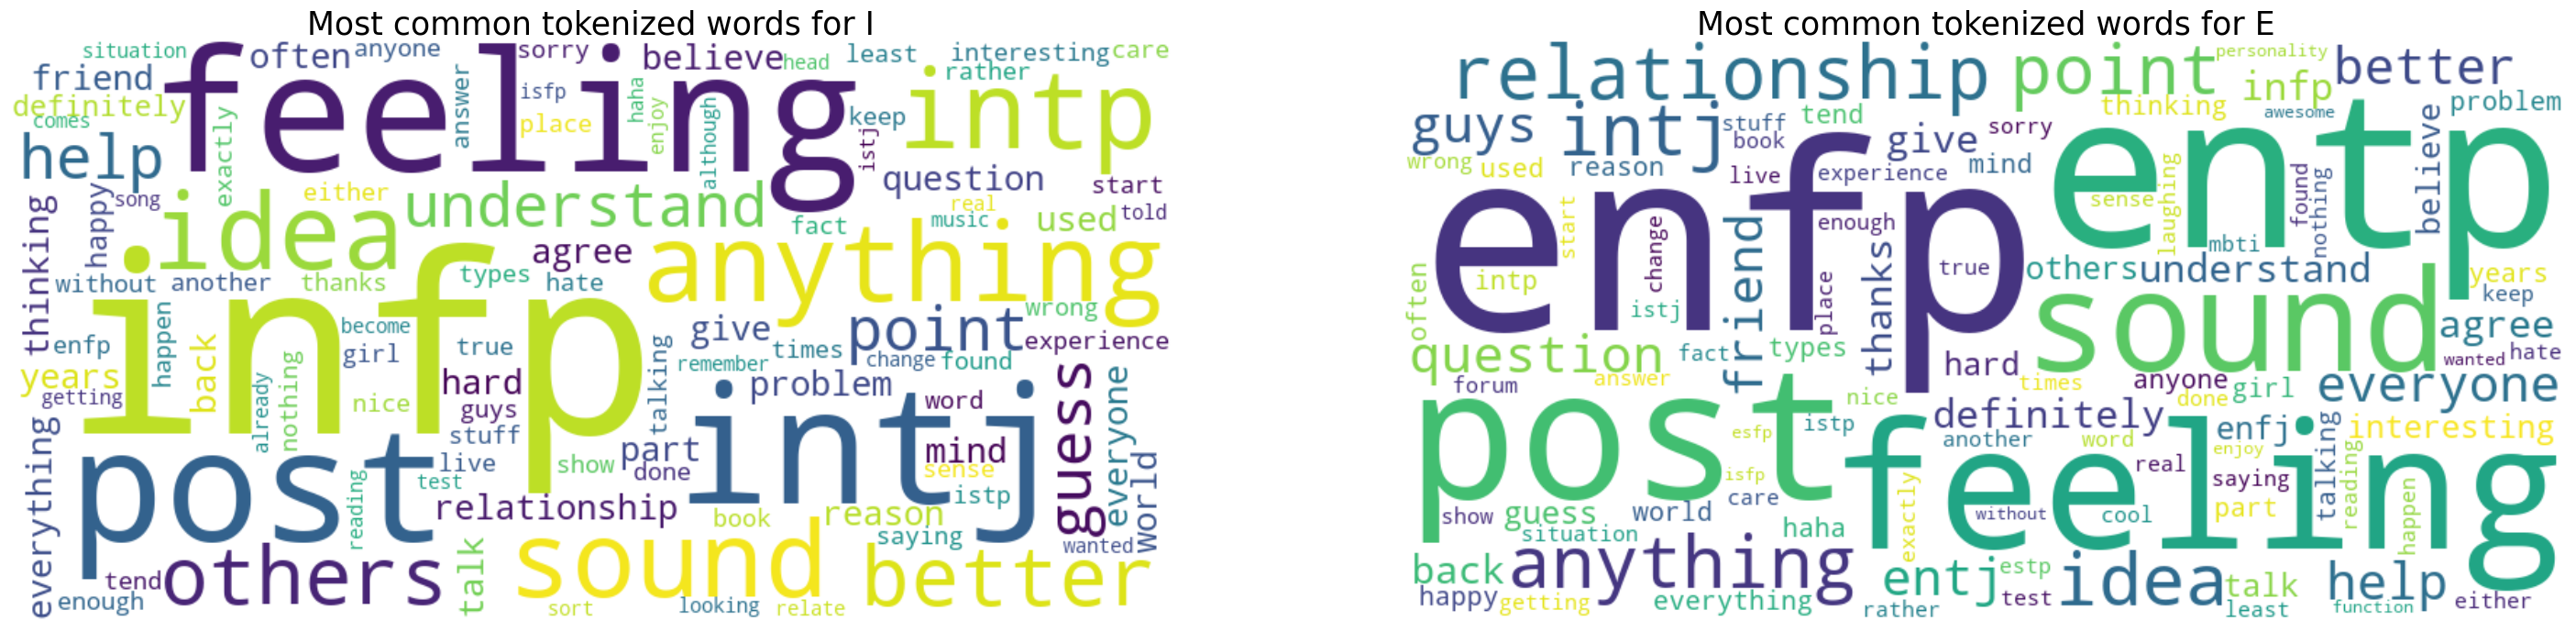

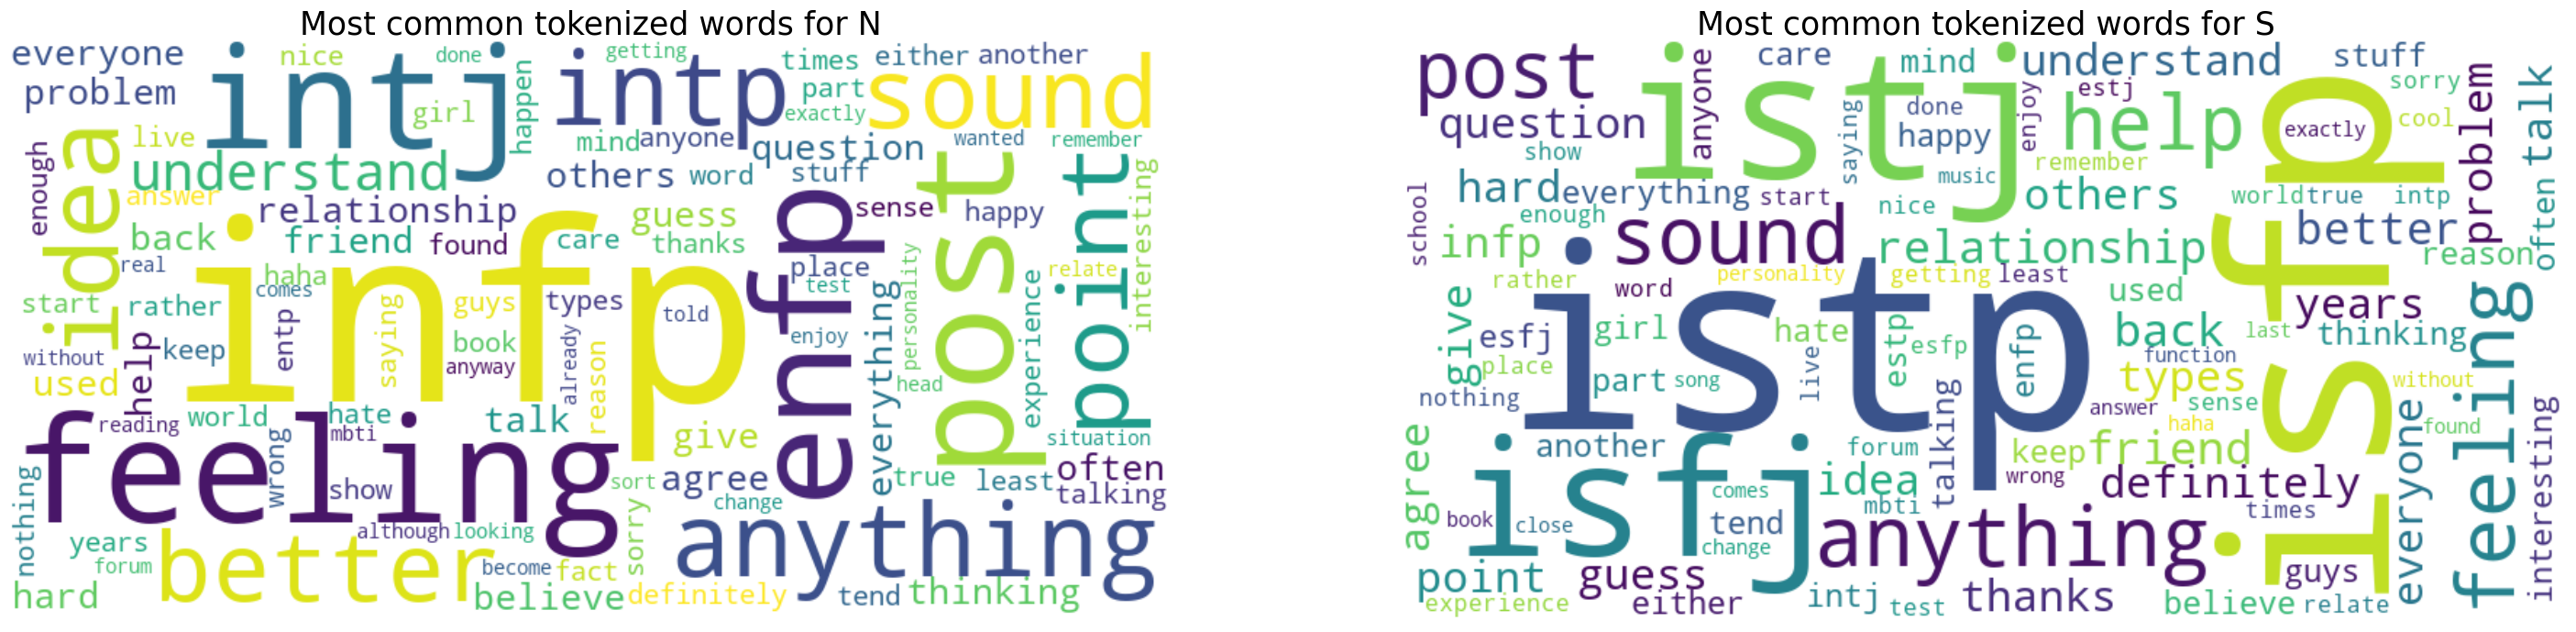

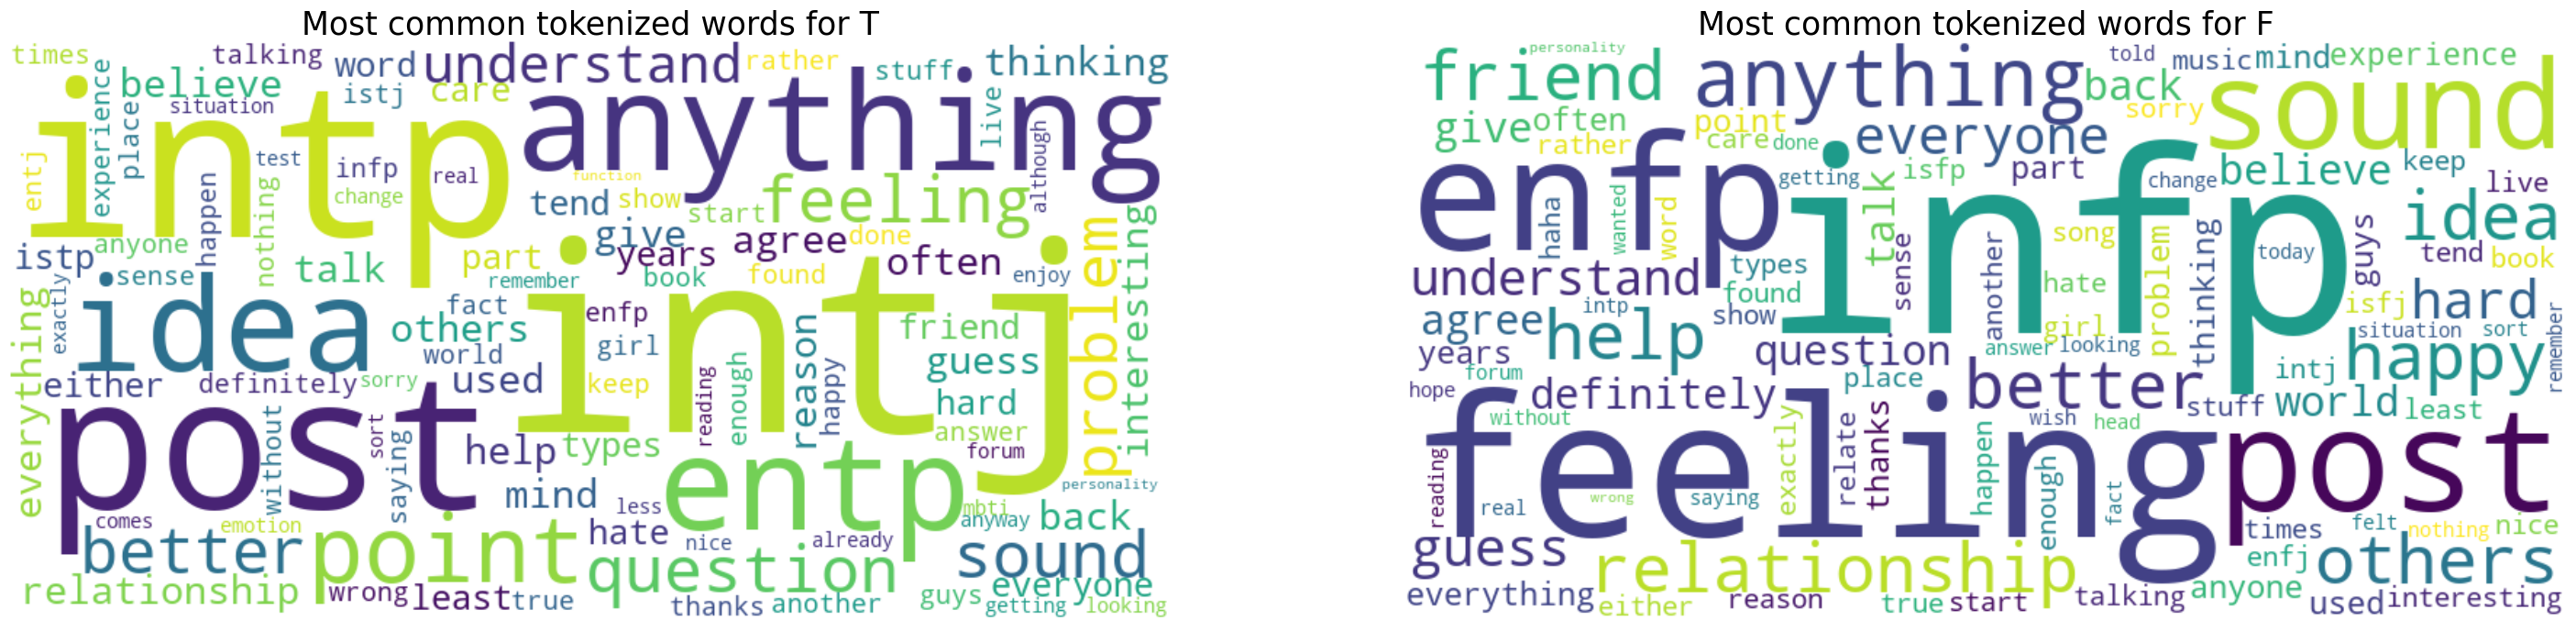

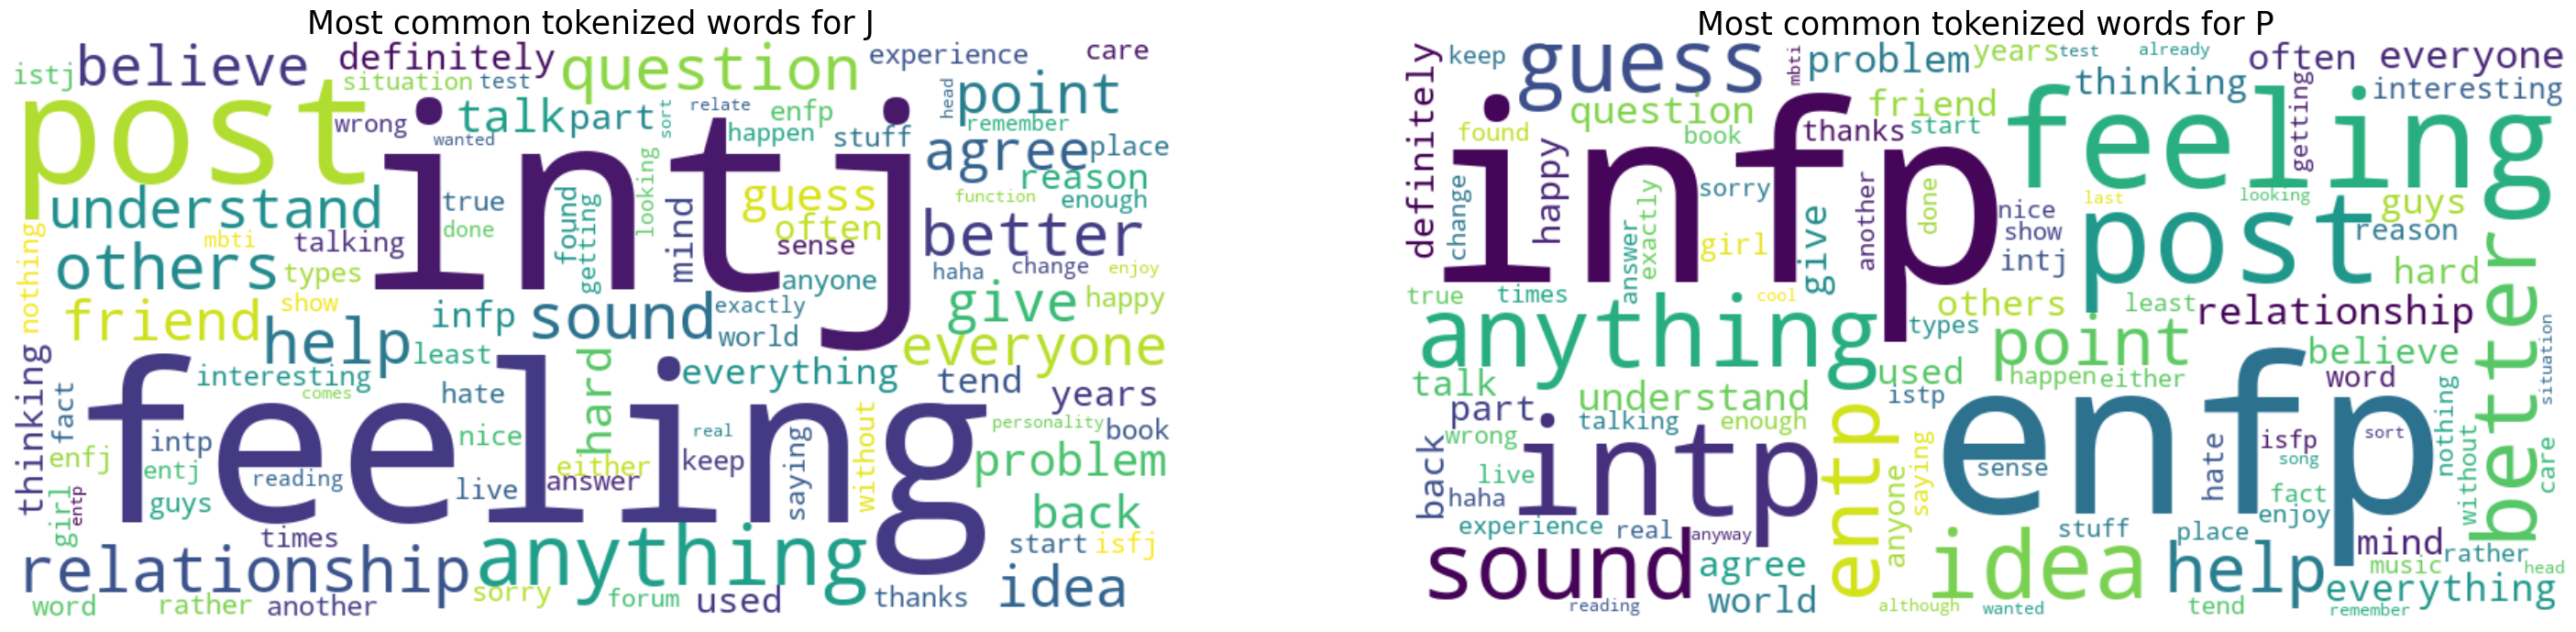

In [36]:
# Define list for dichotomous axes
mbtiaxes_list = ['I_E', 'N_S', 'T_F', 'J_P']
types_list = [['I','E'],['N','S'],['T','F'],['J','P']]

for n in range(4):
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(36, 10)) # Two subplots side by side
    sns.set_context('talk')

    mbtiaxes = mbtiaxes_list[n]
    types = types_list[n]

    for m in range(2):
        text_I = "".join(str(i) for i in df_post[df_post[mbtiaxes]== types[m]].post)
        text_I = text_I.lower()
        wordcloud_I = WordCloud(background_color='white', width=800, height=400, stopwords=stopwords_list, max_words=100, repeat=False, min_word_length=4).generate(text_I)
        axes[m].imshow(wordcloud_I, interpolation='bilinear')
        axes[m].axis('off')
        axes[m].set_title('Most common tokenized words for ' + types[m], fontsize=25)

        # Save the entire figure
        #plt.savefig('mbti_token_clouds.png')

    # Display the plot
    plt.show()

## Viz for Topic modeling

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast
# read the topic data
topic_df = pd.read_csv("../data/csv/topic.csv")
# transfer the data into appropriate format
topic_df['termIndices'] = topic_df['termIndices'].apply(lambda x: [int(idx) for idx in x.strip('[]').split()])
topic_df['termWeights'] = topic_df['termWeights'].apply(lambda x: [float(weight) for weight in x.strip('[]').replace('\n', '').split()])
topic_df['topic_words'] = topic_df['topic_words'].apply(lambda x: ast.literal_eval(x)[0].split(', '))

In [5]:
topic_df

Unnamed: 0  topic                                     termIndices  \
0           0      0       [2, 3, 52, 137, 1, 174, 197, 0, 207, 239]   
1           1      1           [28, 90, 45, 10, 0, 6, 66, 1, 177, 5]   
2           2      2    [63, 115, 0, 84, 1, 164, 173, 181, 258, 216]   
3           3      3          [4, 11, 12, 14, 15, 26, 18, 5, 23, 56]   
4           4      4          [7, 24, 89, 73, 17, 0, 58, 79, 1, 186]   
5           5      5     [10, 60, 0, 68, 67, 153, 146, 125, 64, 159]   
6           6      6            [0, 6, 1, 13, 19, 29, 9, 16, 39, 40]   
7           7      7  [74, 175, 182, 140, 1, 80, 109, 113, 273, 270]   
8           8      8      [33, 41, 32, 42, 104, 4, 83, 101, 28, 191]   
9           9      9        [27, 47, 43, 50, 53, 61, 85, 76, 75, 48]   

                                         termWeights  \
0  [0.07320159, 0.07172727, 0.01203902, 0.0098650...   
1  [0.02081014, 0.0132835, 0.01223422, 0.01127135...   
2  [0.01242351, 0.01107219, 0.00960197, 0.0092553...   
3  [0.01928094, 0.01484883, 0.01470303, 0.0136380...   
4  [0.02037114, 0.01957935, 0.01473427, 0.013314,...   
5  [0.01803781, 0.01749272, 0.01340954, 0.0122775...   
6  [0.03474606, 0.02392615, 0.02147374, 0.0198406...   
7  [0.01404988, 0.01047015, 0.01043404, 0.0087360...   
8  [0.02530466, 0.02404224, 0.01404252, 0.0136279...   
9  [0.01596055, 0.01535442, 0.01397677, 0.0137751...   

                                         topic_words  
0  [user, deleted, say, youre, mbti, sensors, com...  
1  [family, dynamics, isfp, likely, type, guess, ...  
2  [question, questions, type, cant, mbti, others...  
3  [im, infp, intp, intj, entp, enfp, infj, like,...  
4  [, whats, typing, thoughts, personality, type,...  
5  [likely, intuitive, type, enneagram, mean, jud...  
6  [type, guess, mbti, help, based, results, thin...  
7  [love, looking, social, infjs, mbti, esfp, acc...  
8  [ask, anything, make, friend, assumptions, im,...  
9  [function, ni, fi, fe, ne, ti, explain, te, se...

In [16]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

color_list = ['#1f80b8', '#2498c1', '#37acc3', '#52bcc2', '#73c8bd', '#97d6b9', '#bde5b5', '#d6efb3', '#eaf7b1', '#f5fbc4']

# Create subplots with a smaller vertical_spacing
fig = make_subplots(rows=5, cols=2, subplot_titles=[f"Topic {i}" for i in range(10)], vertical_spacing=0.05)

# Define a function to create a bar chart for each topic
def create_topic_plot(df, topic,color):
    # Sort the weights in descending order while maintaining the association with the corresponding words
    sorted_indices = sorted(range(len(df['termWeights'][topic])), key=lambda k: df['termWeights'][topic][k], reverse=False)
    sorted_weights = [df['termWeights'][topic][i] for i in sorted_indices]
    sorted_words = [df['topic_words'][topic][i] for i in sorted_indices]
    
    return go.Bar(
        x=sorted_weights,
        y=sorted_words,
        orientation='h',
        name=f'Topic {topic}',
        marker_color=color  # Set the color of the bar
    )

# Add plots for each topic to the subplots
for topic in topic_df['topic']:
    row = (topic // 2) + 1
    col = (topic % 2) + 1
    # Use the modulo operator to cycle through the color list
    color = color_list[topic % len(color_list)]
    fig.add_trace(create_topic_plot(topic_df, topic, color), row=row, col=col)

# Update layout to make the gap between subplots smaller
fig.update_layout(
    title_text="LDA Topic Weights Plot using Plotly",
    title_x=0.5,  # This centers the title
    height=1200,  # Adjusted for better spacing
    showlegend=False,
    margin=dict(l=20, r=20, b=20)  # Adjust margins to minimize white space
)

# Show the figure
fig.show()